In [1]:
#importing all important libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# reading the csv file
df = pd.read_csv('https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv')

In [3]:
#checking the data tyoe of te file
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [4]:
#data cleaning step
print (df[pd.to_numeric(df['horsepower'], errors='coerce').isnull()])

      mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model_year  origin                  name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl  


In [5]:
# cleaning ? from the particular column
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [6]:
cols = df.columns
#making all the unwanted value as NaN
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [7]:
df.applymap(np.isreal)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,NaN


In [8]:
#droping all the unnecssary columsns
df = df.drop(['name','origin','model_year'], axis=1)
df = df.replace('?', np.nan)
df = df.dropna()

In [9]:
x = df.drop('mpg', axis=1) # independent variable
y = df[['mpg']]            # dependent variable

In [10]:
#making training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [11]:
#linear regression and finding the best fit line for only one column
reg = LinearRegression()
reg.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

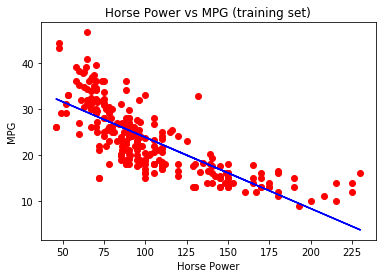

In [17]:
# Visualizing the training set
plt.scatter(x_train[['horsepower']], y_train, color = 'red')
plt.plot(x_train[['horsepower']], reg.predict(x_train[['horsepower']]), color = 'blue')
plt.title('Horse Power vs MPG (training set)')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.show()

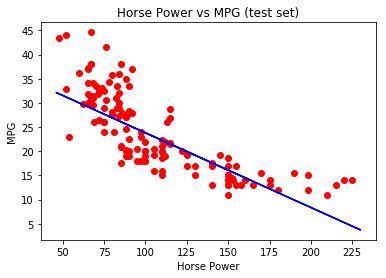

In [18]:
# Visualizing the test set 
plt.scatter(x_test[['horsepower']], y_test, color = 'red')
plt.plot(x_train[['horsepower']], reg.predict(x_train[['horsepower']]), color = 'blue')
plt.title('Horse Power vs MPG (test set)')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.show()

In [19]:
y_predicted = reg.predict(x_test[['horsepower']])  # predicting the value 

#evalution metrices
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 26.80
R²: 0.61


In [20]:
reg = LinearRegression()
# finding the best fit line for more than one column

reg.fit(x_train[['horsepower','weight','cylinders']], y_train)
y_predicted = reg.predict(x_test[['horsepower','weight','cylinders']])

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 19.53
R²: 0.71
